In [1]:
%matplotlib inline

In [91]:
def PCA(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    # TODO: use the correlation matrix instead
    R = NP.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = NP.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return NP.dot(evecs.T, data.T).T

def test_PCA(data, dims_rescaled_data=2):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    _ , _ , eigenvectors = PCA(data, dim_rescaled_data=2)
    data_recovered = NP.dot(eigenvectors, m).T
    data_recovered += data_recovered.mean(axis=0)
    assert NP.allclose(data, data_recovered)


def plot_pca(data):
    from matplotlib import pyplot as MPL
    clr1 =  '#2026B2'
    fig = MPL.figure()
    ax1 = fig.add_subplot(111)
    data_resc = PCA(data)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    print( data_resc )
    MPL.show()

In [3]:
import numpy as NP
df='/home/jon/Dropbox/Research/stylometry-experiments/iris.csv' 
data = NP.loadtxt(df, delimiter=',')
help(NP.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        record data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str, optional
        The character used to indicate the start of a comment;


In [4]:
data.shape

(150, 4)

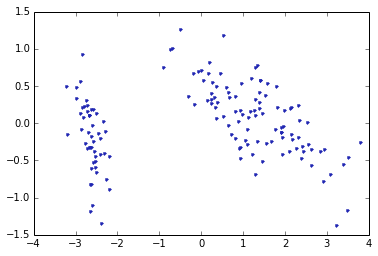

In [5]:
plot_pca(data)

In [6]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
def pieces(text, length, num): 
    out = [] 
    for x in range(num): 
        out.append(text[length*x:length*(x+1)])
    return out

#mel_pieces = [text1[:1000], text1[1001:2000, text1[2001:3000], text1[3001:4000]]

melpieces = pieces(text1, 1000, 4)
auspieces = pieces(text2, 1000, 4)

In [8]:
def freqdists(pieceslist, mfw): 
    dists=[]
    for piece in pieceslist: 
        dists.append(FreqDist(piece).most_common(mfw))
    return dists

meldists = freqdists(melpieces, 100)
ausdists = freqdists(auspieces, 100)

In [9]:
meldists[0][1]

('.', 44)

In [10]:
top100=fdist.most_common(100)

NameError: name 'fdist' is not defined

In [11]:
top100[:5]

NameError: name 'top100' is not defined

In [12]:
len(text1)

260819

In [13]:
type(top100[0])

NameError: name 'top100' is not defined

In [35]:
def makePercents(freqdists, textlen): 
    percentlist = []
    for dist in freqdists: 
        percents = [] 
        for word in dist: 
            wordtext = word[0]
            wordfreq = word[1]
            percentage = (wordfreq/textlen)*100
            percentexpr = [wordtext, percentage]
            percents.append(percentexpr)
        percentlist.append(percents)
    return percentlist

melpercs = makePercents(meldists, len(text1))
auspercs = makePercents(ausdists, len(text2))

In [16]:
def makeComparisonArray(textA, textB): 
    for word in textA: 
        compword = []
        # aaaaargh

In [34]:
mtest = melvillepercents[:8]
atest = austenpercents[:8]
np.array(mtest)
np.array(mtest, dtype=[('token', np.unicode_, 64),('perc', np.float)])

NameError: name 'melvillepercents' is not defined

In [18]:
melNP=np.array(mtest, dtype=[('token', '|S100'),('mel_perc', '<f8')])
ausNP=np.array(atest, dtype=[('token', '|S100'),('aus_perc', '<f8')])

NameError: name 'np' is not defined

In [36]:
import numpy as np
import numpy.lib.recfunctions as recfunctions
def nplist(distlist, label): 
    """ 
    turns a list of freqency distributions in to a list of numpy arrays. 
    Params: a list of freqency distributions, a label (string) for the column, 
    representing the text
    """ 
    nplist = []
    i = 0 
    for dist in distlist: 
        nplist.append(np.array(dist, dtype=[('token', np.unicode_, 64),(label+'_freq'+str(i), np.int16)]))
        i += 1
    return nplist

# make the lists of freqency distributions into lists of numpy arrays
melnps = nplist(meldists, 'mel')
ausnps = nplist(ausdists, 'aus')


In [37]:
ausnps

[array([(',', 74), ('his', 39), ('of', 36), ('and', 33), ('.', 33),
        ('the', 32), ('to', 29), ('a', 21), ('was', 20), ('for', 17),
        ('in', 16), ('he', 14), ('had', 13), ('as', 12), ('by', 11),
        (';', 10), ('which', 9), ('Dashwood', 9), ('Mr', 8), ('their', 7),
        ('son', 7), ('but', 7), ('estate', 7), ('The', 6), ('such', 6),
        ('him', 6), ('so', 6), ('years', 6), ('from', 6), ('-', 6),
        ('them', 5), ('who', 5), ('s', 5), ('be', 5), ('all', 5),
        ('not', 5), ('an', 5), ('it', 5), ("'", 5), ('on', 5),
        ('daughters', 4), ('father', 4), ('own', 4), ('old', 4),
        ('might', 4), ('fortune', 4), ('mother', 4), ('many', 4), ('at', 4),
        ('Norland', 4), ('been', 4), ('He', 4), ('her', 4), ('more', 3),
        ('with', 3), ('child', 3), ('His', 3), ('power', 3), ('three', 3),
        ('large', 3), ('no', 3), ('respectable', 3), ('nephew', 3),
        ('Henry', 3), ('interest', 3), ('could', 3), ('children', 3),
        ('man', 3), (

In [38]:
melnps[1].dtype

dtype([('token', '<U64'), ('mel_freq1', '<i2')])

I think the "Masked Constant" here, i.e. `--`, can be filled in using numpy.array.fillValue(), 

see http://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.set_fill_value.html

In [39]:
def mergearrays(arraylist): 
    merged = None
    for array in arraylist[1:]: 
        if None == merged: #first time
            merged = recfunctions.join_by('token', array, arraylist[arraylist.index(array)-1]) #join first and second arrays
        else: 
            merged = recfunctions.join_by('token', merged, array, jointype='outer')
    return merged

melnptotal = mergearrays(melnps + ausnps)
type(melnptotal)

numpy.ma.core.MaskedArray

In [40]:
melnptotal.fill_value

def fill_array(nparray):
    """
    Takes a numpy masked array and fills it with zeros. 
    Assumes first column is tokens. 
    """ 
    size = len(nparray.fill_value)
    newFillValue = ['N/A']
    for i in range(size-1): 
        newFillValue.append(0)
    newFillValue = tuple(newFillValue)
    nparray.fill_value = newFillValue
    filledArray = nparray.filled()
    return filledArray

npfilled = fill_array(melnptotal)
npfilled[:5]

array([('!', 0, 0, 3, 10, 0, 2, 4, 4), ('!"', 0, 0, 0, 5, 0, 0, 0, 0),
       ('"', 23, 13, 20, 32, 0, 0, 22, 9),
       ("'", 21, 8, 23, 12, 5, 10, 0, 7), ('(', 3, 2, 2, 3, 0, 0, 0, 0)], 
      dtype=[('token', '<U64'), ('mel_freq1', '<i2'), ('mel_freq0', '<i2'), ('mel_freq2', '<i2'), ('mel_freq3', '<i2'), ('aus_freq0', '<i2'), ('aus_freq1', '<i2'), ('aus_freq2', '<i2'), ('aus_freq3', '<i2')])

In [41]:
numbers = npfilled.dtype.names[1:] #slice off the token names
numbersArray = npfilled[[x for x in numbers]]
data = np.array(numbersArray.tolist()).T

In [90]:
labels = numbersArray.dtype.names


array([ -2,   0,   4,   9,   0,   0, -16,   0,  -1,  10,   0,   6,   9,
         0,   3,   0,  -3,   0,   0,  -1,   0,   0,   0,   0,   0,   0,
         0,  -2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  -2,
         0,   0,   0,   0,   0,   0,   0,  -1,  -1,   0,   0,   0,   0,
         0,   0,  -1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,
         0,  -1,  -1,   0,  -1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  -1, -14,   0,   0,   0,  -2,  -1,   0,
         0,   0,   0,  -1,   0,  -5,   0,  -1,   0,   0,   0,   0,   0,
         0,  -3,   0,  -1,   0,  -1,   0,   0,   0,   0,  -1,   0,   0,
         0,   0,   0,  -1,   0,   0,   0,   0,  -1,   0,   0,   0,   0,
         0,   0,  -2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,  -2,   0,   0,  -6,   0,  -1,  -1,   0,   0,
         0,   0,   0,  -1,   0,   8,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

[[-24.10405729  -2.3196727 ]
 [ -2.81029408  -6.34032946]
 [-18.4708141   -9.71319287]
 [-25.40785065  -5.01557208]
 [ 24.3440155  -19.18418368]
 [ 30.85560102 -12.12546941]
 [  7.30348625  26.97340572]
 [  9.55247437  27.59080231]]


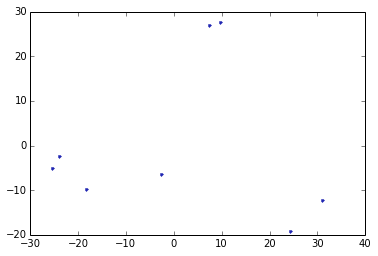

In [92]:
plot_pca(data)

In [94]:
percs = result[['mel_perc','aus_perc']]
percs.fill_value = 0
percs = percs.filled()
percs

array([(7.174707364110744, 3.6028816919012803),
       (2.630943297842565, 1.524045410802127), (1.5612359529022042, 0.0),
       (1.7517895552087845, 0.783301830004716),
       (2.309647686709941, 1.2844156292294655), (0.0, 0.9339810366576055),
       (2.505952403774265, 1.3668482740904613),
       (5.260736372733581, 1.4803369386432736),
       (1.7414375486448457, 1.557785284047558)], 
      dtype=[('mel_perc', '<f8'), ('aus_perc', '<f8')])

In [31]:
percs2 = np.transpose(np.array([percs['mel_perc'], percs['aus_perc']]))
percs2

NameError: name 'percs' is not defined

In [30]:
plot_pca(percs2)

NameError: name 'percs2' is not defined

In [143]:
result.shape

(9,)